<a href="https://colab.research.google.com/github/hellomada/RayField-Systems-Internship-Week-2/blob/notebooks/EDA_and_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will act as exploratory data analysis for the dataset

In [1]:
## Install dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [10]:
# Load data

df = pd.read_csv("/content/Plant_2_Generation_Data.csv")

In [11]:
# Explore data
"""
- Check the head
- check shape
- Find and drop duplicates
- Retrieve summary
- Stats summary
- Find possible correlations
"""

'\n- Check the head\n- check shape\n- Find and drop duplicates\n- Retrieve summary\n- Stats summary\n- Find possible correlations\n'

In [12]:
# Get shape and head of data
df.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [13]:
df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0
67697,2020-06-17 23:45:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,4316.0,209335741.0


In [15]:
# Get summary for DC and AC power for validation
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df['HOUR'] = df['DATE_TIME'].dt.hour
daylight_df = df[df['HOUR'].between(6, 18)]
daylight_df[['DC_POWER', 'AC_POWER']].describe()

# Checking for proper values in AC and DC

,DC_POWER,AC_POWER
count,36654.000000,36654.000000
mean,455.645232,445.627148
std,398.023596,388.739349
min,0.000000,0.000000
25%,78.055385,75.758214
50%,386.963333,380.054286
75%,750.231786,734.261667
max,1420.933333,1385.420000


In [17]:
"""
There are 8 features in the dataset and 258423 rows
"""

# find duplicated
df.duplicated().sum() # - No duplicated

np.int64(0)

In [19]:
# Get info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
 7   HOUR         67698 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 3.9+ MB


In [20]:
# Check for missing values
df.isnull().sum()

,0
DATE_TIME,0
PLANT_ID,0
SOURCE_KEY,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
HOUR,0


In [25]:
# No blank values


df.describe()


,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR
count,67698,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000
mean,2020-06-01 10:44:33.650625024,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08,11.530208
min,2020-05-15 00:00:00,4136001.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2020-05-23 21:00:00,4136001.0,0.000000,0.000000,272.750000,1.996494e+07,6.000000
50%,2020-06-01 23:00:00,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08,12.000000
75%,2020-06-09 23:30:00,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09,18.000000
max,2020-06-17 23:45:00,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09,23.000000
std,NaN,0.0,370.569597,362.112118,2919.448386,7.296678e+08,6.922127


Brief analysis:
- AC and DC values in the 25% and 50 % quertile are all 0 indicating nighttime values 50% of the time
-


In [26]:
print(df.shape)

(67698, 8)


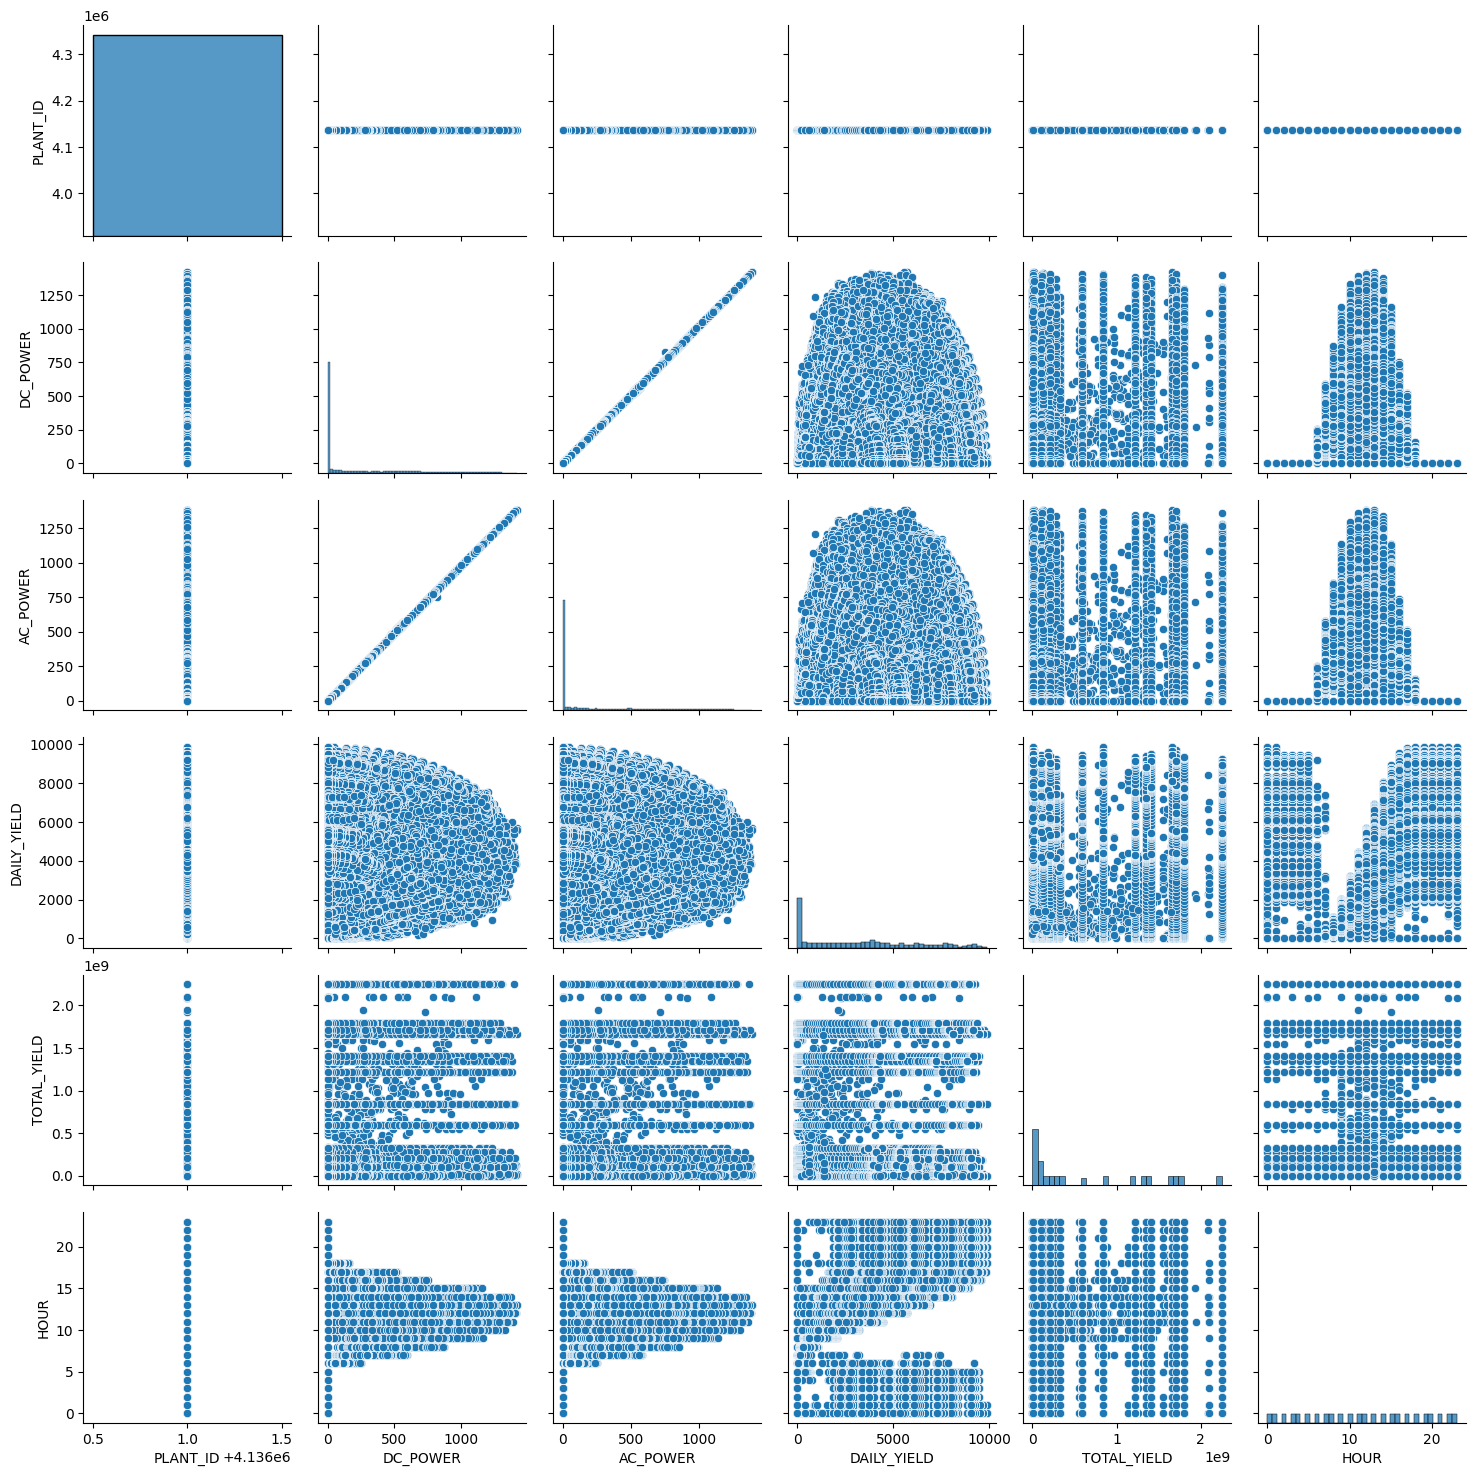

In [28]:
# Correlation analysis with seaborn

sns.pairplot(df)

Data Cleaning

# -----------------------------
# Step 1: Data Cleaning
# -----------------------------
# - Checked and removed missing values
# - Removed duplicates
# - Converted date column to datetime
# - Filtered out negative and invalid values
# - Removed zero power rows (night-time readings)
# - Cleaned column names for consistency
# -----------------------------


In [29]:
# Sort the data chronologically
df = df.sort_values('DATE_TIME')


In [32]:
# Investigate rows where DC or AC power is 0
df[(df['DC_POWER'] == 0) & (df['AC_POWER'] == 0)].head()

# Checking for abnormal values where power is zero to identify non-operational periods or potential data errors

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,HOUR
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2429011.0,0
21,2020-05-15,4136001,xoJJ8DcxJEcupym,0.0,0.0,0.000000,209143593.0,0
20,2020-05-15,4136001,xMbIugepa2P7lBB,0.0,0.0,9166.000000,106656621.0,0
19,2020-05-15,4136001,vOuJvMaM2sgwLmb,0.0,0.0,0.000000,2211962.0,0
18,2020-05-15,4136001,rrq4fwE8jgrTyWY,0.0,0.0,280.214286,120964108.0,0


In [33]:
# Remove rows with negative values
df = df[(df['DC_POWER'] >= 0) & (df['AC_POWER'] >= 0) &
        (df['DAILY_YIELD'] >= 0) & (df['TOTAL_YIELD'] >= 0)]


In [35]:
# Remove night-time rows where power generation is zero for cleaner analysis of operational periods
df_day = df[(df['DC_POWER'] > 0) & (df['AC_POWER'] > 0)]


In [36]:
# Verify data types after all cleaning
df.dtypes


,0
DATE_TIME,datetime64[ns]
PLANT_ID,int64
SOURCE_KEY,object
DC_POWER,float64
AC_POWER,float64
DAILY_YIELD,float64
TOTAL_YIELD,float64
HOUR,int32


In [37]:
# Rename columns to lowercase and replace spaces for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [40]:
# Export the cleaned file
df.to_csv('cleaned_Plant2_generation_data.csv', index=False)


In [41]:
from google.colab import files
files.download('cleaned_Plant2_generation_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
!git config --global user.email "muhammadmustafaarif088@gmail.com"
!git config --global user.name "hellomada"


In [43]:
!git clone https://github.com/hellomada/RayField-Systems-Internship-Week-2.git
%cd RayField-Systems-Internship-Week-2
!git checkout notebooks


Cloning into 'RayField-Systems-Internship-Week-2'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'RayField-Systems-Internship-Week-2'
/content
fatal: not a git repository (or any of the parent directories): .git


In [44]:
!mv /content/EDA_Solar_Power.ipynb /content/RayField-Systems-Internship-Week-2/


mv: cannot stat '/content/EDA_Solar_Power.ipynb': No such file or directory
